# Binary Image Classifier
This notebook takes the `explicit`, `neutral`, and `sexy` image classes and splits them into 2 new classes `SFW` and `NSFW`. `Neutral`, and `sexy` images will be considered `SFW`, because they will not be banned from social media platforms and `explicit` will be reclassified as `NSFW` due to its inappropriate content.

In [1]:
# Mount google drive to notebook to pull pickle files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Import libraries
import time, scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, recall_score, f1_score, precision_score, accuracy_score
 
# Modeling libraries
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Activation, Conv2D
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import pickle
import keras

# Import 'helpers.py' file
from google.colab import files
src = list(files.upload().values())[0]
open('helpers.py','wb').write(src)
import helpers as hp

Saving helpers_py.py to helpers_py.py


In [3]:
# Open Pickle files containing train, test, val data
infile = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X.pickle','rb')
X = pickle.load(infile)

infile2 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y.pickle','rb')
y = pickle.load(infile2)

infile3 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_test.pickle','rb')
X_test = pickle.load(infile3)

infile4 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_test.pickle','rb')
y_test = pickle.load(infile4)

infile5 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/X_val.pickle','rb')
X_val = pickle.load(infile5)

infile6 = open('/content/drive/MyDrive/nsfw_image_classification/Pickles/y_val.pickle','rb')
y_val = pickle.load(infile6)

In [4]:
# Relabel explicit data to 1 for 'NSFW' and sexy and neutral data to 0 for 'SFW'
print(f'Explicit Images In y train: {sum(y==0)}')
y_train_binary = np.where(y > 0, 0, 1)
print(f'NSFW Images In y_train_binary: {sum(y_train_binary==1)}')

Explicit Images In y train: 31257
NSFW Images In y_train_binary: 31257


In [5]:
# Repeat the process for y_test and y_val
print(f'Explicit Images In y_test: {sum(y_test==0)}')
y_test_binary = np.where(y_test > 0, 0, 1)
print(f'NSFW Images In y_test_binary: {sum(y_test_binary==1)}\n')

print(f'Explicit Images In y_val: {sum(y_val==0)}')
y_val_binary = np.where(y_val > 0, 0, 1)
print(f'NSFW Images In y_val_binary: {sum(y_val_binary==1)}')

Explicit Images In y_test: 8929
NSFW Images In y_test_binary: 8929

Explicit Images In y_val: 4468
NSFW Images In y_val_binary: 4468


In [6]:
# Data Augmentation with horizonatal and vertical flips
data_augmentation = Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [7]:
# Reuse best model from 3-class CNN
model = Sequential([ # Model steps are performed one after another rather than at the same time
  data_augmentation, # Apply data augmentation to the model
  layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=X.shape[1:]),
  layers.MaxPooling2D(pool_size=2, strides=2) 
]) # Max pooling to reduce noise and calculate the maximum value in each patch of each feature map


model.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=1)) # More max pooling, decreased stride
model.add(layers.Flatten()) # Transform features into a single column
model.add(layers.Dense(128, activation='relu')) # First hidden layer
model.add(layers.Dense(72, activation='relu')) # Second hidden layer
model.add(layers.Dense(64, activation='relu')) # Third hidden layer
model.add(layers.Dense(30, activation='relu')) # Fourth hidden layer
model.add(layers.Dense(8, activation='relu')) # Fifth hidden layer
model.add(layers.Dense(3, activation='softmax')) # Sixth hidden layer

# Compile and train CNN
opt = SGD(learning_rate=0.06) # Small learning rate to avoid overfitting
model.compile(loss = 'sparse_categorical_crossentropy', # Sparse_categorical_crossentropy because the labels are not one hot encoded, and to reduce comp time
               optimizer = opt, 
               metrics=['accuracy'])

# Fit and score model performance
model_score = model.fit(X,
                        y_train_binary,
                        epochs=50,
                        validation_split=0.2)

Epoch 1/50
1618/1618 [==============================] - 435s 268ms/step - loss: 0.6854 - accuracy: 0.5742 - val_loss: 0.6464 - val_accuracy: 0.6412
Epoch 2/50
1618/1618 [==============================] - 408s 252ms/step - loss: 0.6287 - accuracy: 0.6548 - val_loss: 0.6461 - val_accuracy: 0.6365
Epoch 3/50
1618/1618 [==============================] - 409s 253ms/step - loss: 0.6022 - accuracy: 0.6850 - val_loss: 0.5535 - val_accuracy: 0.7243
Epoch 4/50
1618/1618 [==============================] - 421s 260ms/step - loss: 0.5695 - accuracy: 0.7100 - val_loss: 0.5200 - val_accuracy: 0.7419
Epoch 5/50
1618/1618 [==============================] - 409s 253ms/step - loss: 0.5389 - accuracy: 0.7330 - val_loss: 0.4965 - val_accuracy: 0.7596
Epoch 6/50
1618/1618 [==============================] - 402s 249ms/step - loss: 0.5198 - accuracy: 0.7456 - val_loss: 0.4885 - val_accuracy: 0.7597
Epoch 7/50
1618/1618 [==============================] - 405s 251ms/step - loss: 0.5018 - accuracy: 0.7558 - val_

In [21]:
val_score = model.evaluate(X_test, y_test_binary)

578/578 [==============================] - 25s 43ms/step - loss: 0.3638 - accuracy: 0.8448


In [25]:
print(f'This model has a {round(((val_score[1])* 100),1)}% Accuracy')

This model has a 84.5% Accuracy


### Model Analysis
Once the model was changed to a binary classifier, model performance increased by 3 perecent. This is because hundreds of `sexy` images were misclassified as `neutral` and vice versa in the 3-class model.

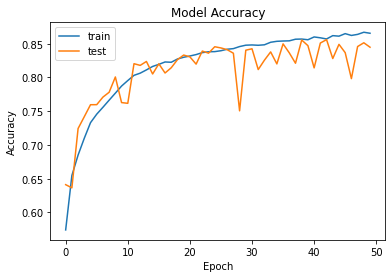

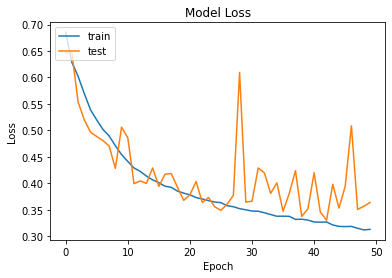

In [19]:
# View change in accuracy and loss with each epoch
hp.plot_model_train_val_accuracy_loss(model_score)

In [14]:
# Calculate predicted values
y_pred = model.predict(X_val)
# Convert predicted 3-d array into 1-d array
y_pred = np.argmax(y_pred, axis=1)
# Convert numpy arrays to pandas series
y_actu = pd.Series(y_val_binary, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')


# Print confusion matrix
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted     0     1   All
Actual                     
0          4055   726  4781
1           703  3765  4468
All        4758  4491  9249


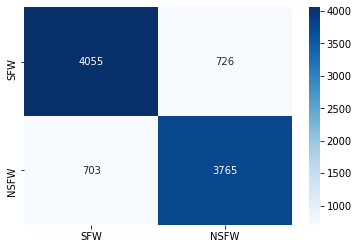

In [15]:
# Plot confusion matrix
conf = confusion_matrix(y_actu, y_pred)
labels = ['SFW', 'NSFW']
sns.heatmap(conf, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels);

In [16]:
# Print classification report
print(classification_report(y_val_binary, y_pred, target_names=labels))

              precision    recall  f1-score   support

         SFW       0.85      0.85      0.85      4781
        NSFW       0.84      0.84      0.84      4468

    accuracy                           0.85      9249
   macro avg       0.85      0.85      0.85      9249
weighted avg       0.85      0.85      0.85      9249



In [17]:
# View model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 90, 90, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 88, 88, 48)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 48)        20784     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 32)        13856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 32)       